In [1]:
import pandas as pd

import seaborn as sns

In [17]:
all_results = [
    "graph_rag_results_BigGraphRAG_10.jsonl",
    "graph_rag_results_BigGraphRAG_20.jsonl",
    "graph_rag_results_BigGraphRAG_30.jsonl",
    "graph_rag_results_BigGraphRAG_40.jsonl",
    "graph_rag_results_BigGraphRAG_50.jsonl",
    "graph_rag_results_BigGraphRAGCache_20.jsonl",
    "graph_rag_results_BigGraphRAGCache_50.jsonl",
]

In [18]:
dfs = []
for result_file in all_results:
    df = pd.read_json(result_file, lines=True)
    dfs.append(df)

orig_df = pd.concat(dfs, ignore_index=True)
    # sns.boxplot(data=df, x="num_samples", y="total_time").set_title(result_file)

In [19]:
orig_df['tag'] = orig_df['tag'].apply(lambda x: "GraphRAG" if x == "BigGraphRAG" else "GraphRAG-LRUCache")

Speedup of GraphRAG-LRUCache over GraphRAG: 3.61x
Speedup of GraphRAG-LRUCache over GraphRAG: 3.61x


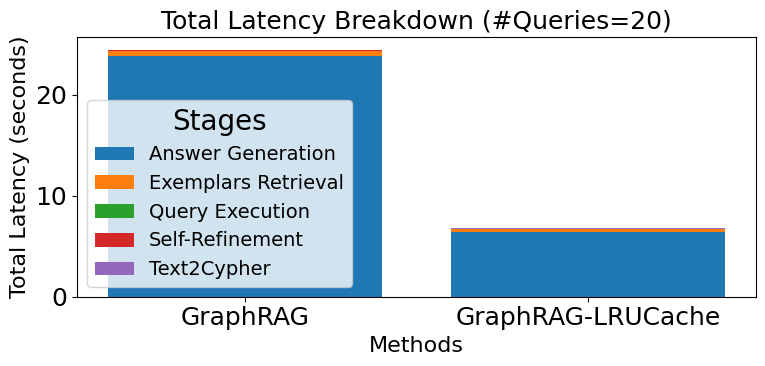

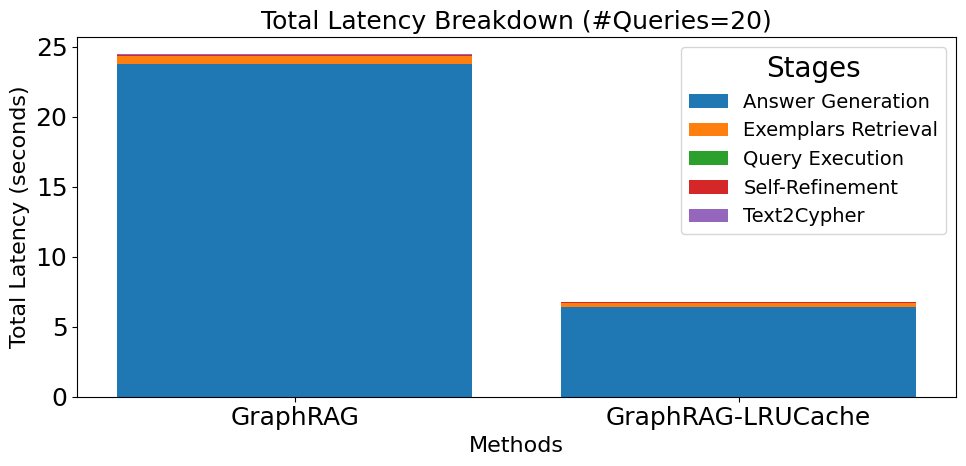

In [20]:
import matplotlib.pyplot as plt

# df: your original dataframe with columns ["name", "tag", "duration", ...]


df = orig_df[orig_df["num_samples"] == 20]
# 1. aggregate duration by (tag, name)
agg = df.groupby(["tag", "name"])["duration"].sum().reset_index()

# 2. pivot so that:
#    - index: tag
#    - columns: name
#    - values: accumulated duration
pivot = agg.pivot(index="tag", columns="name", values="duration").fillna(0)

# 3. build stacked bar per tag
tags = pivot.index.tolist()
x = range(len(tags))

plt.figure(figsize=(8, 4))

bottom = [0.0] * len(tags)  # bottom for stacked bars

for stage_name in pivot.columns:
    values = pivot[stage_name].tolist()
    plt.bar(x, values, bottom=bottom, label=stage_name)
    # update bottom for next stack
    bottom = [b + v for b, v in zip(bottom, values)]

plt.xticks(x, tags)
plt.xlabel("Methods")
plt.ylabel("Total Latency (seconds)")
plt.title("Total Latency Breakdown (#Queries=20)")
plt.legend(title="Stages")
plt.tight_layout()
# plt.show()
plt.savefig("latency_breakdown_num_samples_20.pdf")
import matplotlib.pyplot as plt

# df: your original dataframe with columns ["name", "tag", "duration", ...]

df = orig_df[orig_df["num_samples"] == 20]

# 1. aggregate duration by (tag, name)
agg = df.groupby(["tag", "name"])["duration"].sum().reset_index()

# 2. pivot the table
pivot = agg.pivot(index="tag", columns="name", values="duration").fillna(0)

# 3. build stacked bar per tag
tags = pivot.index.tolist()
x = range(len(tags))

plt.figure(figsize=(10, 5))

bottom = [0.0] * len(tags)

# set global default font size
plt.rcParams.update({
    "font.size": 18,              # base font size
    "axes.titlesize": 18,         # title font
    "axes.labelsize": 16,         # x/y labels
    "xtick.labelsize": 18,        # x tick labels
    "ytick.labelsize": 18,        # y tick labels
    "legend.fontsize": 14,        # legend labels
    "legend.title_fontsize": 20   # legend title
})


for stage_name in pivot.columns:
    values = pivot[stage_name].tolist()
    plt.bar(x, values, bottom=bottom, label=stage_name)
    bottom = [b + v for b, v in zip(bottom, values)]

plt.xticks(x, tags)
plt.xlabel("Methods")
plt.ylabel("Total Latency (seconds)")
plt.title("Total Latency Breakdown (#Queries=20)")
plt.legend(title="Stages")
plt.tight_layout()
plt.savefig("latency_breakdown_num_samples_20.pdf")

# Compute the speedup between GraphRAG and GraphRAG-LRUCache
graph_rag_times = pivot.loc["GraphRAG"].sum()
graph_rag_cache_times = pivot.loc["GraphRAG-LRUCache"].sum()
speedup = graph_rag_times / graph_rag_cache_times
print(f"Speedup of GraphRAG-LRUCache over GraphRAG: {speedup:.2f}x")

# Compute the speedup between GraphRAG and GraphRAG-LRUCache
graph_rag_times = pivot.loc["GraphRAG"].sum()
graph_rag_cache_times = pivot.loc["GraphRAG-LRUCache"].sum()
speedup = graph_rag_times / graph_rag_cache_times
print(f"Speedup of GraphRAG-LRUCache over GraphRAG: {speedup:.2f}x")

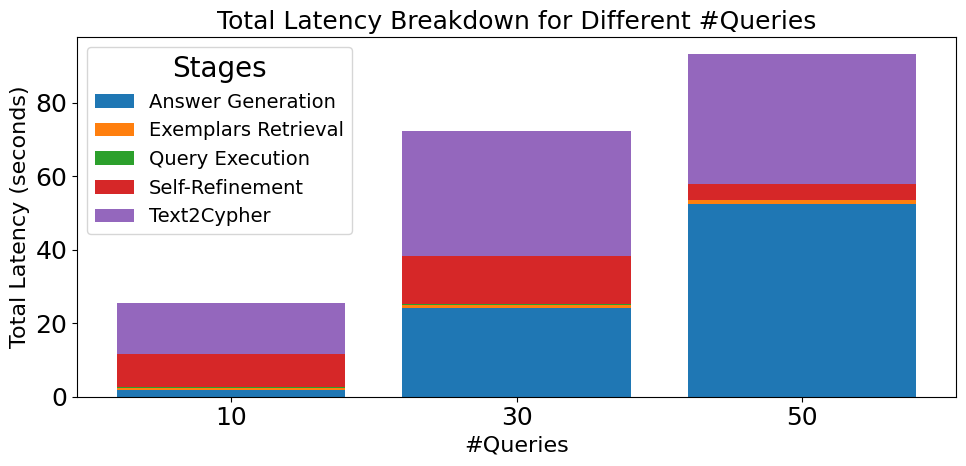

In [16]:
import matplotlib.pyplot as plt

# df: your dataframe, must contain ["name", "tag", "duration", "num_samples"]

df = orig_df[(orig_df["tag"] == "GraphRAG") & (orig_df["num_samples"].isin([10, 30, 50]))]
# 1. aggregate per (num_samples, name)
agg = df.groupby(["num_samples", "name"])["duration"].sum().reset_index()

# 2. pivot: rows = num_samples, columns = name
pivot = agg.pivot(index="num_samples", columns="name", values="duration").fillna(0)

# 3. draw stacked bars
x = range(len(pivot.index))
bottom = [0.0] * len(pivot.index)

plt.figure(figsize=(10, 5))

for stage_name in pivot.columns:
    values = pivot[stage_name].tolist()
    plt.bar(x, values, bottom=bottom, label=stage_name)
    bottom = [b + v for b, v in zip(bottom, values)]

# set global default font size
plt.rcParams.update({
    "font.size": 18,              # base font size
    "axes.titlesize": 18,         # title font
    "axes.labelsize": 16,         # x/y labels
    "xtick.labelsize": 18,        # x tick labels
    "ytick.labelsize": 18,        # y tick labels
    "legend.fontsize": 14,        # legend labels
    "legend.title_fontsize": 20   # legend title
})

plt.xticks(x, pivot.index.tolist())
plt.xlabel("#Queries")
plt.ylabel("Total Latency (seconds)")
plt.title("Total Latency Breakdown for Different #Queries")
plt.legend(title="Stages")
plt.tight_layout()
# plt.show()
plt.savefig("latency_breakdown_different_num_samples.pdf")